# Bobcat Population Analysis

In [200]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from numpy import random as rd

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
default_number_of_years = 32

## Base Model

### Ex-situ Model

    Population  Year
0   160.000000     0
1   220.400000     1
2   207.508000     2
3   171.014240     3
4   148.864067     4
5   132.077399     5
6   116.595072     6
7   102.928307     7
8    91.022414     8
9    80.534675     9
10   71.263123    10
11   63.067398    11
12   55.819382    12
13   49.406421    13
14   43.731212    14
15   38.708517    15
16   34.263017    16
17   30.326920    17
18   26.842340    18
19   23.758182    19
20   21.028563    20
21   18.612563    21
22   16.474120    22
23   14.581371    23
24   12.906089    24
25   11.423283    25
26   10.110839    26
27    8.949185    27
28    7.920996    28
29    7.010937    29
30    6.205437    30
31    5.492482    31
32    4.861440    32


[Text(0.5, 1.0, 'Wild Bobcat Population')]

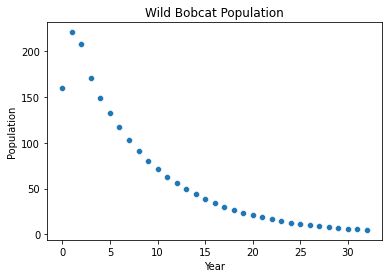

In [201]:
default_leslie_matrix = np.array([[0.32, 0.32, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01],
                         [0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Population' : nth_population,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_ex_situ = growth()

sns.scatterplot(data = data_nth_population_ex_situ, x = "Year", y = "Population").set(title = "Wild Bobcat Population")

### In-situ Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      659.378462     5
6      816.476326     6
7     1011.801542     7
8     1254.810158     8
9     1556.937354     9
10    1932.309667    10
11    2398.526699    11
12    2977.476937    12
13    3696.349631    13
14    4588.910176    14
15    5697.086946    15
16    7072.962384    16
17    8780.820087    17
18   10900.820052    18
19   13532.641624    19
20   16799.935634    20
21   20856.107525    21
22   25891.603462    22
23   32142.871022    23
24   39903.448538    24
25   49537.743797    25
26   61498.146761    26
27   76346.272961    27
28   94779.334716    28
29  117662.879458    29
30  146071.432573    30
31  181338.953086    31
32  225121.471343    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

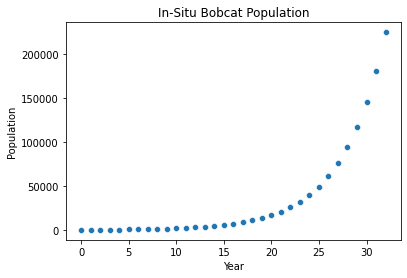

In [202]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_in_situ = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

## Extended Model

In [203]:
default_catastrophie_matrix = np.identity(16)
for i in range(0,16):
    default_catastrophie_matrix[i][i] = 0.2

### Ex-situ Catastrophe Model

    Population  Year
0   160.000000     0
1   220.400000     1
2   207.508000     2
3   171.014240     3
4   148.864067     4
5   102.304585     5
6    90.179592     6
7    79.609293     7
8    70.436753     8
9    62.330192     9
10   42.690150    10
11   37.783535    11
12   33.442948    12
13   29.601364    13
14   26.201419    14
15   17.952006    15
16   15.890401    16
17   14.064282    17
18   12.448082    18
19   11.017904    19
20    7.548539    20
21    6.681244    21
22    5.913611    22
23    5.234189    23
24    4.632824    24
25    3.173984    25
26    2.809319    26
27    2.486551    27
28    2.200866    28
29    1.948005    29
30    1.334594    30
31    1.181260    31
32    1.045542    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Catastrophes')]

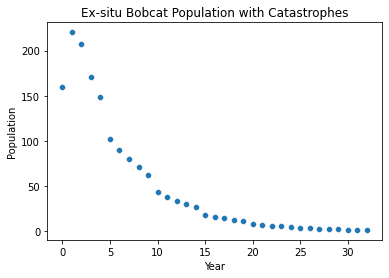

In [204]:
def growth_extended_catastrophe(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % 5 == 0):
            current_population = leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population)
            nth_population_extended[i] = np.sum(current_population)
        else:
            current_population = leslie_matrix.dot(current_population)
            nth_population_extended[i] = np.sum(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended_catastrophe()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Catastrophes")

### In-situ Catastrophe Model

      Population  Year
0     160.000000     0
1     283.400000     1
2     364.551000     2
3     436.625020     3
4     533.537755     4
5     552.670911     5
6     684.600633     6
7     848.506276     7
8    1052.449850     8
9    1305.975322     9
10   1359.727132    10
11   1687.880327    11
12   2095.358644    12
13   2601.299925    13
14   3229.469401    14
15   3363.482980    15
16   4175.808641    16
17   5183.981809    17
18   6435.506790    18
19   7989.264304    19
20   8320.349644    20
21  10329.216078    21
22  12823.098774    22
23  15919.108345    23
24  19762.621007    24
25  20581.588272    25
26  25550.811571    26
27  31719.805491    27
28  39378.242825    28
29  48885.735032    29
30  50911.571255    30
31  63203.672643    31
32  78463.581541    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population with Catastrophes')]

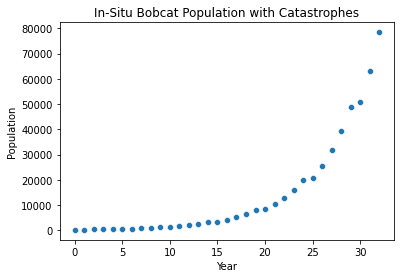

In [205]:
data_nth_population_extended_in_situ = growth_extended_catastrophe(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population with Catastrophes")

### Ex-situ Migration Model

    Population  Year
0   160.000000     0
1   177.400000     1
2    89.758000     2
3    56.839240     3
4    63.528011     4
5    44.845609     5
6    48.397819     6
7    45.396724     7
8    44.468988     8
9    44.894857     9
10   44.194572    10
11   44.392288    11
12   44.279091    12
13   44.253454    13
14   44.274684    14
15   44.247240    15
16   44.258336    16
17   44.249534    17
18   44.261043    18
19   44.233462    19
20   44.286613    20
21   44.201385    21
22   44.317641    22
23   44.177293    23
24   44.331326    24
25   44.173823    25
26   44.326897    26
27   44.183191    27
28   44.314911    28
29   44.196442    29
30   44.300996    30
31   44.210725    31
32   44.286667    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Migrations')]

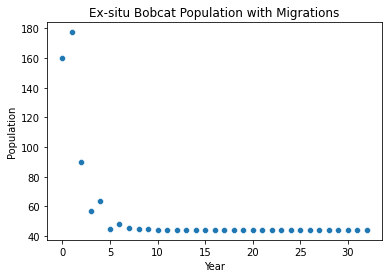

In [206]:
def growth_extended_migration(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        current_population = leslie_matrix.dot(current_population) + np.array([7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) - current_population*0.4
        nth_population_extended[i] = np.sum(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended_migration()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Migrations")

### In-situ Migration Model

    Population  Year
0   160.000000     0
1   240.400000     1
2   205.571000     2
3   185.701820     3
4   191.480187     4
5   180.049391     5
6   177.172351     6
7   173.953357     7
8   170.293774     8
9   168.081273     9
10  165.835968    10
11  164.016312    11
12  162.525278    12
13  161.226310    13
14  160.154975    14
15  159.190506    15
16  158.643554    16
17  157.164243    17
18  159.148983    18
19  153.008818    19
20  162.642373    20
21  147.744936    21
22  165.733760    22
23  145.153491    23
24  165.685964    24
25  145.802978    25
26  163.539499    26
27  147.768785    27
28  161.062069    28
29  149.746659    29
30  158.932781    30
31  151.404348    31
32  157.252069    32


[Text(0.5, 1.0, 'In-situ Bobcat Population with Migrations')]

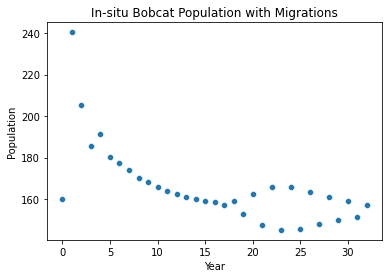

In [207]:
data_nth_population_extended_ex_situ = growth_extended_migration(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "In-situ Bobcat Population with Migrations")

## Stochastic Model

In [208]:
# Seed and success values
rd.seed(0)
default_success_rate_catastrophes = 0.7 # 70% of the times, a catastrophe is successful
default_catastrophie_rate = 5 # A catastrophe happens every 5 years

### Ex-situ Catastrophe Model

    Population  Year
0   160.000000     0
1   220.400000     1
2   207.508000     2
3   171.014240     3
4   148.864067     4
5   105.661919     5
6    93.276057     6
7    82.342646     7
8    72.817931     8
9    64.427740     9
10   57.010499    10
11   50.453918    11
12   44.655506    12
13   39.525137    13
14   34.984969    14
15   24.773451    15
16   21.928331    16
17   19.409229    17
18   17.179097    18
19   15.205236    19
20   10.766624    20
21    9.529632    21
22    8.434749    22
23    7.465662    23
24    6.607917    24
25    4.678977    25
26    4.141400    26
27    3.665586    27
28    3.244440    28
29    2.871680    29
30    2.033398    30
31    1.799777    31
32    1.592997    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Stochastic Catastrophes')]

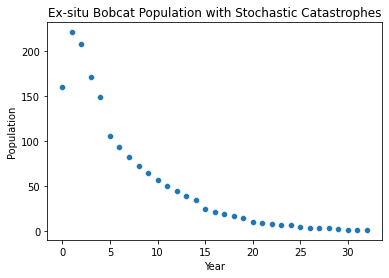

In [209]:
def growth_stochastic_catastrophe(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix, success_rate = default_success_rate_catastrophes, catastrophe_rate = default_catastrophie_rate):
    nth_population_stochastic = np.zeros(number_of_years+1)
    nth_population_stochastic[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % catastrophe_rate == 0):
            current_success = rd.random()
            # print(current_success) # Uncomment to see the success rates
            if (current_success < success_rate):
                current_population = leslie_matrix.dot(current_population)
                current_population = current_population - catastrophie_matrix.dot(current_population)
                nth_population_stochastic[i] = np.sum(current_population)
            else:
                current_population = leslie_matrix.dot(current_population)
                nth_population_stochastic[i] = np.sum(current_population)
                
        else:
            current_population = leslie_matrix.dot(current_population)
            nth_population_stochastic[i] = np.sum(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_stochastic,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ_stochastic = growth_stochastic_catastrophe()

sns.scatterplot(data = data_nth_population_extended_ex_situ_stochastic, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Stochastic Catastrophes")

### In-situ Catastrophe Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      527.502769     5
6      653.181060     6
7      809.441233     7
8     1003.848126     8
9     1245.549883     9
10    1545.847734    10
11    1918.821359    11
12    2381.981549    12
13    2957.079705    13
14    3671.128141    14
15    4557.669556    15
16    5658.369907    16
17    7024.656070    17
18    8720.656042    18
19   10826.113299    19
20   10751.958806    20
21   13347.908816    21
22   16570.626215    22
23   20571.437454    23
24   25538.207064    24
25   31704.156030    25
26   39358.813927    26
27   48861.614695    27
28   60658.774218    28
29   75304.242853    29
30   74788.573477    30
31   92845.543980    31
32  115262.193328    32


[Text(0.5, 1.0, 'In-situ Bobcat Population with Stochastic Catastrophes')]

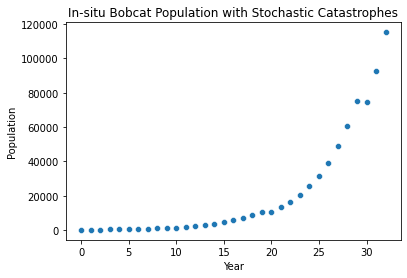

In [210]:
data_nth_population_extended_in_situ_stochastic = growth_stochastic_catastrophe(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ_stochastic, x = "Year", y = "Population").set(title = "In-situ Bobcat Population with Stochastic Catastrophes")

### 